In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('../experiments/sw-data/amd.csv')
# df = pd.read_csv('../experiments/sw-data/sigmax.csv')

df['throughput'] = df['bytes_in'] / df['time']
# df.set_index(['framework', 'api', 'allocated', 'max_values', 'num_jsons'], inplace=True)
df.sort_values(['max_values', 'throughput'], inplace=True)
display(df)


,framework,api,allocated,max_values,num_jsons,bytes_in,bytes_out,time,throughput
3,RapidJSON,DOM,False,1,7271551,134217732,87258604,0.620892,2.161692e+08
4,RapidJSON,DOM (in situ),False,1,7271551,134217732,87258604,0.557205,2.408768e+08
5,RapidJSON,SAX,False,1,7271551,134217732,87258604,0.300925,4.460172e+08
0,simdjson,DOM,False,1,7271551,134217732,87258604,0.276948,4.846315e+08
6,RapidJSON,SAX,True,1,7271551,134217732,87258604,0.265314,5.058826e+08
1,simdjson,DOM,True,1,7271551,134217732,87258604,0.246681,5.440943e+08
2,simdjson,DOM (no keys),True,1,7271551,134217732,87258604,0.240382,5.583518e+08
8,Boost Spirit.X3,whitespace,False,1,7271551,134217732,87258604,0.134996,9.942349e+08
7,Custom,whitespaces,False,1,7271551,134217732,87258604,0.120200,1.116620e+09
12,RapidJSON,DOM,False,2,6488212,134217737,103798904,0.646047,2.077523e+08


In [9]:
dg = df.groupby(['framework', 'max_values', 'bytes_in', 'bytes_out']).agg({'throughput':'max'})
dg.sort_values(by=['framework', 'max_values'], inplace=True)
dg['Throughput (GB/s)'] = dg.throughput * 1e-9
del dg['throughput']
display(dg)


Throughput (GB/s)
framework       max_values bytes_in  bytes_out                   
Boost Spirit.X3 1          134217732 87258604            0.994235
                2          134217737 103798904           0.698978
                4          134217740 128303440           0.618136
                8          134217764 157861596           0.478334
                16         134217768 186337836           0.449819
                32         134217827 208512692           0.433394
                64         134217903 223034756           0.422493
                128        134217816 231471012           0.416445
                256        134218013 236026080           0.411183
Custom          1          134217732 87258604            1.116620
                2          134217737 103798904           0.757723
                4          134217740 128303440           0.659265
                8          134217764 157861596           0.496189
                16         134217768 186337836           0.461391
                32         134217827 208512692           0.442308
                64         134217903 223034756           0.428054
                128        134217816 231471012           0.420155
                256        134218013 236026080           0.414719
RapidJSON       1          134217732 87258604            0.505883
                2          134217737 103798904           0.445952
                4          134217740 128303440           0.424529
                8          134217764 157861596           0.405882
                16         134217768 186337836           0.399352
                32         134217827 208512692           0.395046
                64         134217903 223034756           0.392381
                128        134217816 231471012           0.390645
                256        134218013 236026080           0.389566
simdjson        1          134217732 87258604            0.558352
                2          134217737 103798904           0.488496
                4          134217740 128303440           0.440458
                8          134217764 157861596           0.396402
                16         134217768 186337836           0.373203
                32         134217827 208512692           0.360830
                64         134217903 223034756           0.355673
                128        134217816 231471012           0.347789
                256        134218013 236026080           0.349862

In [10]:
dh = dg.unstack('framework')
dh.index.rename(inplace=True, names=['Max. values', 'Bytes in', 'Bytes out'])
dh = dh.droplevel(0, axis=1)
display(dh)

,,framework,Boost Spirit.X3,Custom,RapidJSON,simdjson
Max. values,Bytes in,Bytes out,,,,
1,134217732,87258604,0.994235,1.116620,0.505883,0.558352
2,134217737,103798904,0.698978,0.757723,0.445952,0.488496
4,134217740,128303440,0.618136,0.659265,0.424529,0.440458
8,134217764,157861596,0.478334,0.496189,0.405882,0.396402
16,134217768,186337836,0.449819,0.461391,0.399352,0.373203
32,134217827,208512692,0.433394,0.442308,0.395046,0.360830
64,134217903,223034756,0.422493,0.428054,0.392381,0.355673
128,134217816,231471012,0.416445,0.420155,0.390645,0.347789
256,134218013,236026080,0.411183,0.414719,0.389566,0.349862


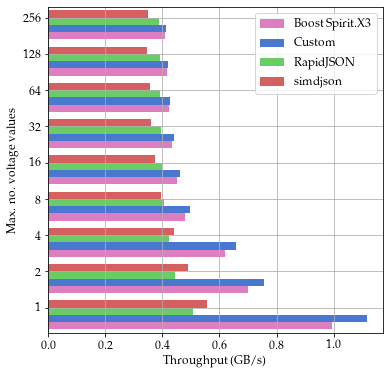

In [11]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 12
})

#dh.columns.rename(inplace=True, name='Framework')
#dh.index.rename(inplace=True, name='Max. values')

fig, ax = plt.subplots(figsize=(6, 6))
colors = ['#dc7ec0', '#4878d0', '#6acc64', '#d65f5f', '#d5bb67']

y_labels = [x[0] for x in dh.index.to_list()]
y_ticks = np.arange(0, len(y_labels))

impls = dh.columns.to_list()
bars = []
height = 1/(len(impls)+1)

for i, impl in enumerate(impls):
    x = dh[impl].to_numpy()
    y = np.arange(0, len(x))

    b = ax.barh(y=y+i*height, width=x, height=height, color=colors[i])
    bars.append(b)

ax.set_ylim(-height, len(y_labels)-height)

ax.set_yticks(y_ticks + 0.5)
ax.set_yticklabels(y_labels)
ax.set_ylabel("Max. no. voltage values")

ax.set_xlabel("Throughput (GB/s)")

ax.grid(which='both')

ax.legend(bars, impls)

fig.savefig('software.pdf')